In [7]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.integrate as integrate
from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline
import scipy.special as special
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import pandas as pd
import h5py
import time
import tqdm
from typing import List, Tuple, Sequence

import os
os.chdir(os.getcwd())

#### System parameters

In [8]:
N = 15       # number of loops
lc = 0.12     # magnetic core length / m
l = 7e-2
w = 18e-6 * 4
ur = 70000
u0 = 4* np.pi * 1e-7
u = ur * u0
Ac = l * w   # cross-sectional area / m2
fre = 4      # degauss frequency
T = 20       # deguass time
V_gain = 3.6
# R = 1 * 3.6 / 6  # resistance calculate
R = 1.55
gain = 20

In [9]:
data =  pd.read_csv("C:\\Users\\yuanhang.yang\\Documents\\GitHub\\new_cavity\\windfreak\\moku_data\\0.1Vpp2Hz0off_3_11.csv")
mea_time = np.array(data.Time)
dt = (mea_time[-1] - mea_time[0])/len(mea_time)
N_data  = int((T - 1/fre)/dt)
Vin = np.array(data.ChannelA)+0.0083
Vpick = np.array(data.ChannelB)
peaks,_ = find_peaks(Vpick,distance=500,height= max(Vpick)*0.9)
#peaks,_ = find_peaks(Vpick,distance=500,height= max(Vpick)*0.001)
print(peaks)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yuanhang.yang\\Documents\\GitHub\\new_cavity\\windfreak\\moku_data\\0.1Vpp2Hz0off_3_11.csv'

In [ ]:
time_used = mea_time[peaks[0]:peaks[0] + N_data]
Vin_used  = Vin[peaks[0]:peaks[0]+ N_data] 
I = Vin_used * V_gain /R
H = np.array(I) * N / lc
Vpick_used = Vpick[peaks[0]:peaks[0] + N_data] 

NameError: name 'mea_time' is not defined

In [ ]:
n = np.s_[0:2000]
plt.plot(time_used[n],I[n])
plt.plot(time_used[n],Vpick_used[n])

NameError: name 'time_used' is not defined

In [ ]:
B = []
B_int = []
Bini = [0]
dB = -1 * np.array(Vpick_used)/Ac/N/gain
print(np.mean(dB[-1000:-1]))
for a in dB:
        Bini.append(Bini[-1] + (a - np.mean(dB[-1000:-1])-0.01)* dt )
B.append(Bini)
print(B[0])

9.410666891688312
[0, -0.545669446950241, -0.7205813774046671, -0.7742519567692322, -0.8271575176747119, -0.857041102025701, -0.8737315604331953, -0.8853498945398091, -0.9001461591168622, -0.9097387631711648, -0.9152832592970566, -0.9227441277906921, -0.9296157921141975, -0.9351326017502797, -0.9381141167367318, -0.9431391271800866, -0.9477363796629946, -0.9505392022294007, -0.9530974288233626, -0.9570978811283952, -0.960179566355455, -0.9611673041854931, -0.9643612252272343, -0.9667683217366109, -0.9690848756366993, -0.970206621495309, -0.972614327491595, -0.974273324436682, -0.975617544163725, -0.976633984294546, -0.9783944268863746, -0.9796561853444351, -0.9801578012354305, -0.9814303047155788, -0.9824586975542156, -0.9829726273312384, -0.9836910398369824, -0.9845372864985897, -0.9847089331560508, -0.9851648262716723, -0.9852458061654964, -0.9855297563596728, -0.9857090103129699, -0.9858329477205907, -0.9853198475522643, -0.9852388168969755, -0.9846930076195443, -0.9848085025102756,

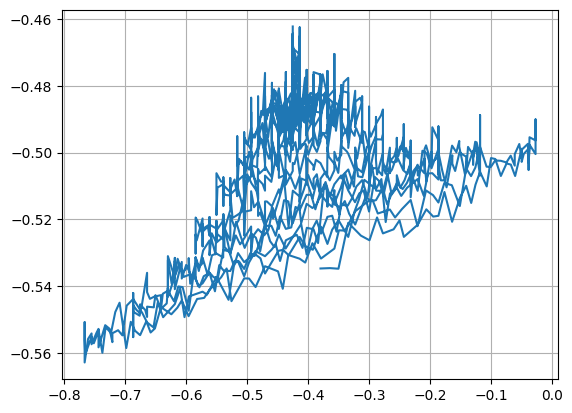

In [ ]:
plt.plot(H[-5000:-1000],B[0][-5000:-1000],"-")
plt.grid(True)

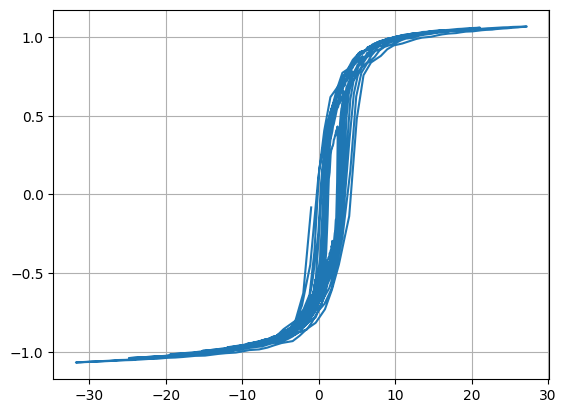

In [ ]:
plt.plot(H,B[0][0:-1]-(max(B[0])+min(B[0]))/2,"-")
#plt.plot(H,B[0][0:-1],"-")
plt.grid(True)
# plt.plot(Vin_used[-1],B[0][-1]-(max(B[0])-min(B[0]))/2,"o",color = "r")

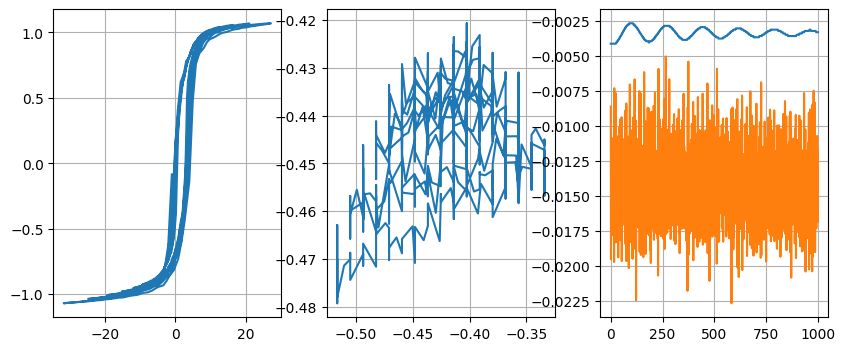

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10, 4))
ax[0].plot(H[0:1000],B[0][0:1000]-(max(B[0])+min(B[0]))/2,"-")
ax[0].grid(True)
ax[1].plot(H[4000:5000],B[0][4000:5000]-(max(B[0])+min(B[0]))/2,"-")
ax[1].grid(True)
ax[2].plot(I[4000:5000],"-")
ax[2].plot(Vpick_used[4000:5000],"-")
ax[2].grid(True)

[11420.840823723973, 1827.334531795838, 23116.88263115215, 104918.72909832548, 412363.10230790975, 557903.0207695249, 1259379.2043457783, 387877.61288119154, 204934.7138462619, 53223.33587754865, 383740.2516771252, 82230.05393081227, 29901.837793022725, 62453.20551707284, 2045.5237296222074, 30718.12359484373]


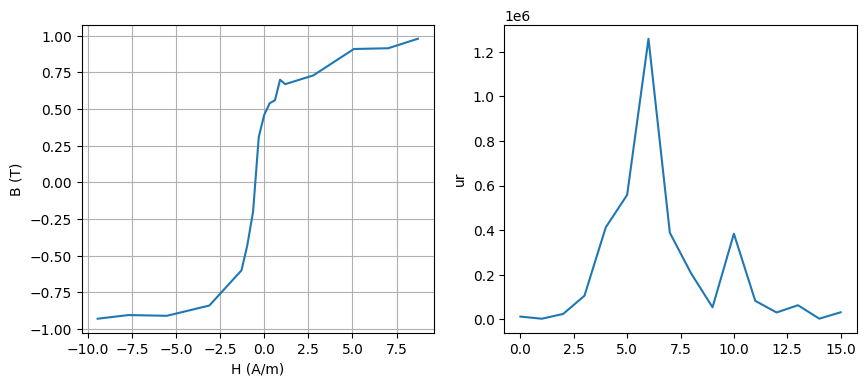

In [ ]:
u = []
offs = [-0.0325,-0.0265,-0.019,-0.0107,-0.00443,-0.0033,-0.00217,-0.00106,0,0.00107,0.0021,0.0031,0.0041,0.0096,0.0175,0.0242,0.03]
H_settle = np.array(offs) * V_gain /R  * N / lc
B_settle = [-0.93,-0.905,-0.91,-0.84,-0.6,-0.43,-0.2,0.31,0.46,0.54,0.56,0.7,0.67,0.73,0.91,0.915,0.98]
for i in range(len(H_settle)-1):
    u.append(abs((B_settle[i+1]-B_settle[i])/(H_settle[i+1]-H_settle[i]))/u0)
print(u)
fig,ax = plt.subplots(1,2,figsize=(10, 4))
ax[0].plot(H_settle,B_settle)
ax[0].set_xlabel("H (A/m)")
ax[0].set_ylabel("B (T)")
ax[1].plot(u)
ax[1].set_ylabel("ur")
ax[0].grid(True)

c:\Users\yuanhang.yang\Anaconda3\envs\cavity\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


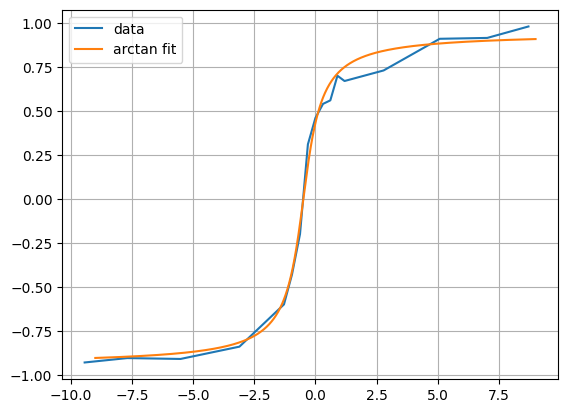

In [ ]:
# Defining parametrized arctangent function
def f(x, k, w, x0, y0):
    return k * np.arctan(w*(x-x0)) 

output = curve_fit(f, H_settle, B_settle, full_output=True)
copt = output[0]
H_fit = np.linspace(-9,9,1000)
dH = H_fit[1] - H_fit[0]
u_fit = np.gradient(B_fit,dH)/u0
B_fit = f(H_fit,*copt)
plt.plot(H_settle,B_settle,label = "data")
plt.plot(H_fit,f(H_fit,*copt),label = "arctan fit")
plt.legend()
plt.grid(True)

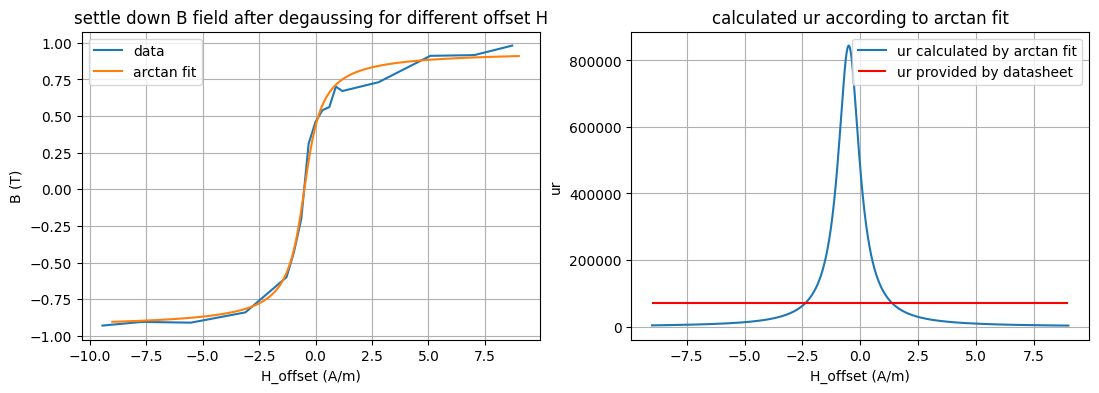

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(13, 4))
ax[0].plot(H_settle,B_settle,label = "data")
ax[0].plot(H_fit,f(H_fit,*copt),label = "arctan fit")
ax[0].set_xlabel("H_offset (A/m)")
ax[0].set_ylabel("B (T)")
ax[0].set_title("settle down B field after degaussing for different offset H")
ax[1].plot(H_fit,u_fit, label = "ur calculated by arctan fit")
ax[1].hlines(xmin = -9, xmax = 9 , y = 70000,color = "r",label = "ur provided by datasheet")
ax[1].set_xlabel("H_offset (A/m)")
ax[1].set_ylabel("ur")
ax[1].set_title("calculated ur according to arctan fit")
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend()
ax[1].legend()

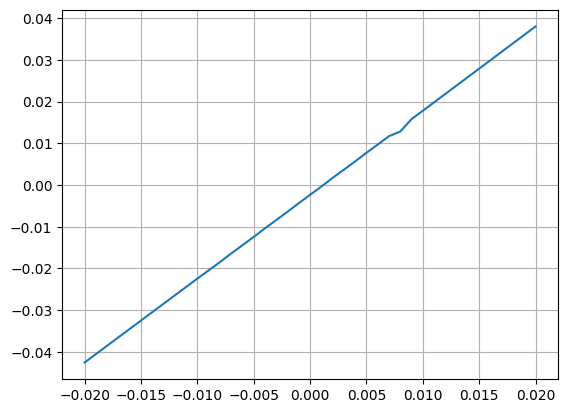

In [ ]:
off_set = np.array([-20,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,20])/1000
off_mea = np.array([-42.56,-22.44,-20.47,-18.49,-16.42,-14.44,-12.45,-10.37,-8.40,-6.40,-4.34,-2.35,-0.36,1.72,3.69,5.68,7.72,9.72,11.72,12.83,15.81,17.82,38.03])/1000
plt.plot(off_set,off_mea)
plt.grid(True)

In [ ]:
coef = np.polyfit(off_set, off_mea, 1)
poly1d_fn = np.poly1d(coef) 
H_inte = np.array(poly1d_fn(offs)) * V_gain /R  * N / lc

c:\Users\yuanhang.yang\Anaconda3\envs\cavity\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


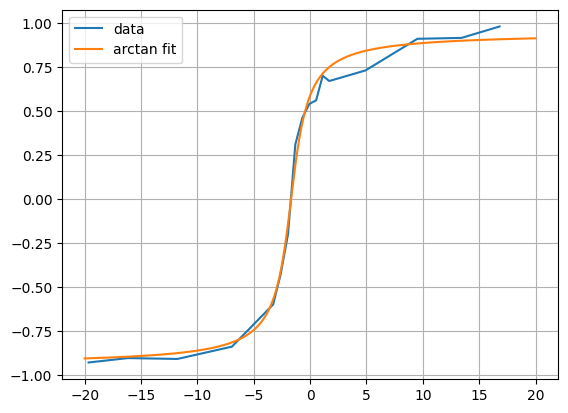

In [ ]:
# Defining parametrized arctangent function
def f(x, k, w, x0, y0):
    return k * np.arctan(w*(x-x0)) 

output = curve_fit(f, H_inte, B_settle, full_output=True)
copt = output[0]
H_fit = np.linspace(-20,20,1000)
dH = H_fit[1] - H_fit[0]
u_fit = np.gradient(B_fit,dH)/u0
B_fit = f(H_fit,*copt)
plt.plot(H_inte,B_settle,label = "data")
plt.plot(H_fit,f(H_fit,*copt),label = "arctan fit")
plt.legend()
plt.grid(True)

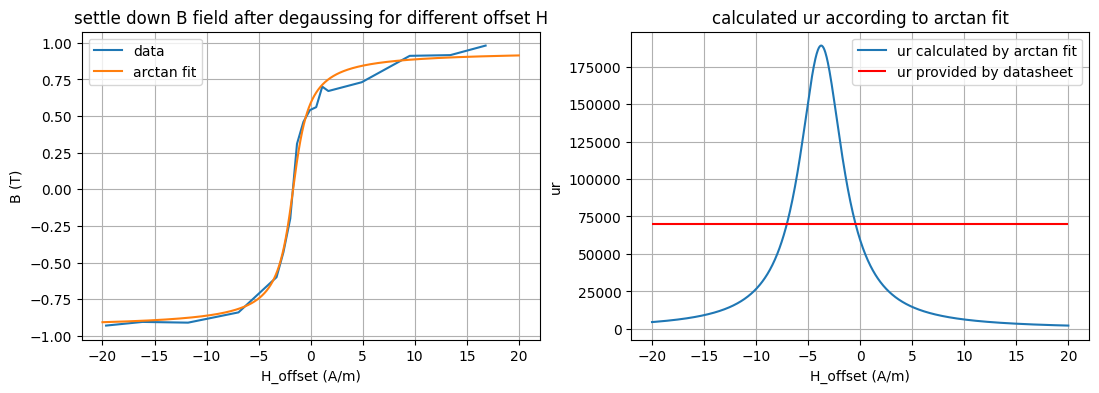

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(13, 4))
ax[0].plot(H_inte,B_settle,label = "data")
ax[0].plot(H_fit,f(H_fit,*copt),label = "arctan fit")
ax[0].set_xlabel("H_offset (A/m)")
ax[0].set_ylabel("B (T)")
ax[0].set_title("settle down B field after degaussing for different offset H")
ax[1].plot(H_fit,u_fit, label = "ur calculated by arctan fit")
ax[1].hlines(xmin = -20, xmax = 20 , y = 70000,color = "r",label = "ur provided by datasheet")
ax[1].set_xlabel("H_offset (A/m)")
ax[1].set_ylabel("ur")
ax[1].set_title("calculated ur according to arctan fit")
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend()
ax[1].legend()